## Capstone Project: Battle of the Neighborhoods 

### Introduction

The City of New York, usually called either New York City (NYC) or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States.[10] Located at the southern tip of the state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass[11] and one of the world's most populous megacities,[12][13] with an estimated 19,979,477 people in its 2018 Metropolitan Statistical Area and 22,679,948 residents in its Combined Statistical Area

Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. English remains the most widely spoken language, although there are areas in the outer boroughs in which up to 25% of people speak English as an alternate language, and/or have limited or no English language fluency. English is least spoken in neighborhoods such as Flushing, Sunset Park, and Corona.

With its diverse culture, comes diverse food items. There are many restaurants in New York City, each belonging to different categories like Chinese, Indian, French etc. Interested to know how far consumers are willing to travel to satisfy their cravings. We call this people’s willingness to travel. Understanding the complex interaction between someone’s preference for pizza and the distance he/she willing to travel to get it can help retailers develop a nuanced understanding of a local population’s food preferences

So as part of this project, we will list and visualize all major parts of New York City that has great Indian restaurants.


### Data

For this project we need the following data :

New York City data that contains list Boroughs, Neighborhoods along with their latitude and longitude.
        Data source : https://cocl.us/new_york_dataset
        Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of new york city. Indian resturants in each neighborhood of new york city.
        Data source : Fousquare API
        Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only indian resturants. 
    GeoSpace data
        Data source : https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
        Description : By using this geo space data we will get the New york Borough boundaries that will help us visualize choropleth map. 



In [247]:
import pandas as pd
import numpy as np
import matplotlib as plotly
import json
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# New York DataSet 
with open ('nyu_2451_34572-geojson.json') as j:
    nycdf=json.load(j)


In [236]:
#nycdf['features'][5]['properties']['borough']
CLIENT_ID = 'K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET' # your Foursquare ID
CLIENT_SECRET = 'E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET
CLIENT_SECRET:E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB


In [237]:
address = 'New York City, New York'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
categoryId = '4bf58dd8d48988d10f941735'
print(latitude, longitude)

#search_query = 'Indian Restaurant'
radius = 25000
LIMIT=100

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, categoryId, radius, LIMIT)
#url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
results

C:\Users\SandeepVenkatesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


40.7127281 -74.0060152


{'meta': {'code': 200, 'requestId': '5d806fb4a19793002b76155b'},
 'response': {'venues': [{'id': '575dea4c498e2739e43a27e2',
    'name': 'Aahar Indian Cuisine',
    'location': {'address': '10 Murray St',
     'crossStreet': 'Broadway',
     'lat': 40.71330656515891,
     'lng': -74.00799405698501,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71330656515891,
       'lng': -74.00799405698501}],
     'distance': 178,
     'postalCode': '10007',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['10 Murray St (Broadway)',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '333939',
     'url':

In [238]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [239]:
venues = results['response']['venues']

df = json_normalize(venues)
df.tail()



categories delivery.id  \
45  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...         NaN   
46  [{'id': '4bf58dd8d48988d146941735', 'name': 'D...         NaN   
47  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...      316969   
48  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...      316606   
49  [{'id': '4bf58dd8d48988d118951735', 'name': 'G...         NaN   

                 delivery.provider.icon.name  \
45                                       NaN   
46                                       NaN   
47  /delivery_provider_seamless_20180129.png   
48  /delivery_provider_seamless_20180129.png   
49                                       NaN   

               delivery.provider.icon.prefix delivery.provider.icon.sizes  \
45                                       NaN                          NaN   
46                                       NaN                          NaN   
47  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   
48  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   
49                                       NaN                          NaN   

   delivery.provider.name                                       delivery.url  \
45                    NaN                                                NaN   
46                    NaN                                                NaN   
47               seamless  https://www.seamless.com/menu/aanchal-indian-r...   
48               seamless  https://www.seamless.com/menu/tikka-indian-gri...   
49                    NaN                                                NaN   

    hasPerk                        id  location.address  ...  \
45    False  573f5e67498ed93babdc468a    964 Dekalb Ave  ...   
46    False  43a7557bf964a5206b2c1fe3      114 E 1st St  ...   
47    False  4fe78cebe4b0116a38b0436d     45-12 23rd St  ...   
48    False  5631511b498e3d6d7e0a4df0  185 Grand Street  ...   
49    False  4e0123ec62843b639cfab90d       180 10th St  ...   

                            location.formattedAddress  \
45  [964 Dekalb Ave (Lewis Ave), New York, NY 1122...   
46  [114 E 1st St (btwn 1st Ave & Ave A), New York...   
47  [45-12 23rd St, Long Island City, NY 11101, Un...   
48  [185 Grand Street, Brooklyn, NY 11211, United ...   
49  [180 10th St (at Manila Ave), Jersey City, NJ ...   

                              location.labeledLatLngs location.lat  \
45  [{'label': 'display', 'lat': 40.69304293778504...    40.693043   
46  [{'label': 'display', 'lat': 40.72241837769248...    40.722418   
47  [{'label': 'display', 'lat': 40.74659123310255...    40.746591   
48  [{'label': 'display', 'lat': 40.71434305888687...    40.714343   
49  [{'label': 'display', 'lat': 40.72882261278684...    40.728823   

   location.lng  location.neighborhood location.postalCode location.state  \
45   -73.936819                    NaN               11221             NY   
46   -73.986948                    NaN               10009             NY   
47   -73.945466                    NaN               11101             NY   
48   -73.960903                    NaN               11211             NY   
49   -74.041311                    NaN               07302             NJ   

                         name    referralId venuePage.id  
45              Bombay Xpress  v-1568698292          NaN  
46     Punjabi Grocery & Deli  v-1568698292     51700124  
47  Aanchal Indian Restaurant  v-1568698292    474540009  
48         Tikka Indian Grill  v-1568698292          NaN  
49          Prime Food Market  v-1568698292          NaN  

[5 rows x 25 columns]

In [241]:
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df_filtered = df.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]

df_filtered

name               categories  \
0              Aahar Indian Cuisine        Indian Restaurant   
1                The Drunken Munkey        Indian Restaurant   
2        Meals on Wheels Halal Cart               Food Truck   
3             The Kati Roll Company        Indian Restaurant   
4                           Pippali        Indian Restaurant   
5                        Pondicheri        Indian Restaurant   
6               Bhatti Indian Grill        Indian Restaurant   
7                             INDAY        Indian Restaurant   
8                     Indian Accent  North Indian Restaurant   
9                  Saravanaa Bhavan  South Indian Restaurant   
10                            INDAY        Indian Restaurant   
11                            Dhaba        Indian Restaurant   
12                          Gupshup        Indian Restaurant   
13                       Taco Mahal        Indian Restaurant   
14                             Rahi        Indian Restaurant   
15                             Adda        Indian Restaurant   
16            The Kati Roll Company        Indian Restaurant   
17                     Bengal Tiger        Indian Restaurant   
18                           Junoon        Indian Restaurant   
19                       Karma Kafe        Indian Restaurant   
20  Deep Indian Kitchen (Indikitch)        Indian Restaurant   
21                          Babu Ji        Indian Restaurant   
22                          Benares        Indian Restaurant   
23            The Kati Roll Company        Indian Restaurant   
24                        indikitch        Indian Restaurant   
25                        Indikitch        Indian Restaurant   
26                        IndiKitch        Indian Restaurant   
27                 Utsav Restaurant        Indian Restaurant   
28                        Baar Baar        Indian Restaurant   
29                    Delhi Heights        Indian Restaurant   
30                 Tamarind TriBeCa        Indian Restaurant   
31                 Moti Mahal Delux        Indian Restaurant   
32                      Lahore Deli        Indian Restaurant   
33               Trinciti Roti Shop     Caribbean Restaurant   
34                    Himalayan Yak       Tibetan Restaurant   
35                          Samudra        Indian Restaurant   
36             Patiala Indian Grill        Indian Restaurant   
37                     Masala Times        Indian Restaurant   
38                            Sahib        Indian Restaurant   
39  Chennai Garden by Tiffin Wallah        Indian Restaurant   
40            The Kati Roll Company        Indian Restaurant   
41               Adyar Anand Bhavan        Indian Restaurant   
42                      Spice Grill        Indian Restaurant   
43                      Chote Nawab        Indian Restaurant   
44             The Bombay Bread Bar        Indian Restaurant   
45                    Bombay Xpress        Indian Restaurant   
46           Punjabi Grocery & Deli            Deli / Bodega   
47        Aanchal Indian Restaurant        Indian Restaurant   
48               Tikka Indian Grill        Indian Restaurant   
49                Prime Food Market            Grocery Store   

                        address  cc              city        country  \
0                  10 Murray St  US          New York  United States   
1                31 Cornelia St  US          New York  United States   
2             Park Avenue South  US          New York  United States   
3                  22 Maiden Ln  US          New York  United States   
4                 129 E 27th St  US          New York  United States   
5                  15 W 27th St  US          New York  United States   
6             100 Lexington Ave  US          New York  United States   
7                 1133 Broadway  US          New York  United States   
8                 123 W 56th St  US          New York  United States   
9              81 Lexington Ave  US          N

### Get Geolocation of Each Address


In [278]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Define a function to interact with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

In [279]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    #CLIENT_ID = os.environ['CLIENT_ID'] # your Foursquare ID
    #CLIENT_SECRET = os.environ['CLIENT_SECRET'] # your Foursquare Secret
    CLIENT_ID = 'K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET' ##os.environ['CLIENT_ID'] # your Foursquare ID
    CLIENT_SECRET = 'E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB' #os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    print (url)
    #if 'groups' in results["response"]:
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

In [242]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET' ##os.environ['CLIENT_ID'] # your Foursquare ID
    CLIENT_SECRET = 'E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB' #os.environ['CLIENT_SECRET'] # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Now we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [280]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [281]:
# get new york data
new_york_data=get_new_york_data()

new_york_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [282]:
new_york_data.shape

(306, 4)

So there are total of 306 different Neighborhoods in New York


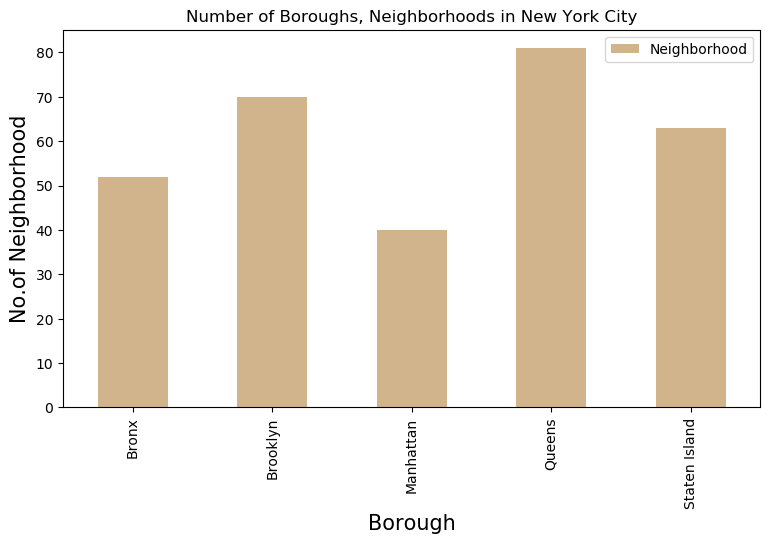

In [283]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Boroughs, Neighborhoods in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar', color='tan')
#legend
plt.legend()
#displays the plot
plt.show()

In [284]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']  
    #indian_resturants.head()
    #print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for restaurant_detail in indian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
        print (name , str(count))
    count+=1

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.89470517661,-73.84720052054902&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.87429419303012,-73.82993910812398&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.887555677350775,-73.82780644716412&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.89543742690383,-73.90564259591682&radius=1000&limit=100
https://api.foursquare.com/v2/venues/e

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.85727710073895,-73.88845196134804&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.88139497727086,-73.91719048210393&radius=1000&limit=100
Cumin Indian Cuisine 36
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.90854282950666,-73.90453054908927&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.85064140940335,-73.8320737824047&radius=1000&limit=100
https://api.f

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.673931143187154,-73.99444087145339&radius=1000&limit=100
Kanan's Indian Restaurant 69
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.68852726018977,-73.97290574369092&radius=1000&limit=100
Dosa Royale 70
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.67232052268197,-73.97705030183924&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.68239101144211,-73.87661596457296&radius=1000&l

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.85190252555305,-73.93690027985234&radius=1000&limit=100
Kismat Indian Restaurant 102
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.86768396449915,-73.92121042203897&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.823604284811935,-73.94968791883366&radius=1000&limit=100
Clove Indian Restaurant & Bar 104
Mumbai Masala 104
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.8169344294

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.744048505122024,-73.88165622288388&radius=1000&limit=100
Samudra 133
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.65422527738487,-73.8381376460028&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.74238175015667,-73.85682497345258&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.72526378216503,-73.84447500788983&radius=1000&limit=100
https://api.foursquare.c

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.696911253789885,-73.7904261313554&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.69444538522359,-73.75867603727717&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.67521139591733,-73.77258787620906&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.666230490368584,-73.76042092682287&radius=1000&limit=100
https://api.foursquare.com/v2/venue

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.7146110815117,-73.8410221123401&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.6449815710044,-74.07935312512797&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.64061455913511,-74.08701650516625&radius=1000&limit=100
Dosa Garden 199
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.62692762538176,-74.07790192660066&radius=1000&limit=100
https://api.foursquare.

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.59632891379513,-74.08751118005578&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.588672948199275,-74.09639905312521&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.57352690574283,-74.09348266303591&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.57621558711788,-74.10585598545434&radius=1000&limit=100
Taste Of India II 234
https://api.f

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.73350025429757,-73.79671678028349&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.73493618075478,-73.80486120040537&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.7703173929982,-73.89467996270574&radius=1000&limit=100
Tikka Grill 267
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.83142834161548,-73.90119903387667&radius=1000&limit=100
https://api.foursquar

https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.85272297633017,-73.86172577555115&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.86578787802982,-73.85931863221647&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.8703923914147,-73.90152264513144&radius=1000&limit=100
https://api.foursquare.com/v2/venues/explore?&client_id=K0ABVIBDCOQQVC2CI0AVNYCYOFD02KVEIOGNQH3JGNJQ4IET&client_secret=E3AG2VXKR4HCQYPM2UPVEJXC45VHEHMRXWEF2DLTKWCPGDBB&v=20180605&ll=40.64692606658579,-73.94817709920184&radius=1000&limit=100
Great Indian Curry 301
https://api.fo

We see that Queens has highest number of neighborhoods

Now we will collect Indian resturants for each Neighborhood


In [285]:
indian_rest_ny.head()


Borough    Neighborhood                        ID  \
0   Bronx        Woodlawn  4c0448d9310fc9b6bf1dc761   
1   Bronx     Parkchester  4c194631838020a13e78e561   
2   Bronx  Spuyten Duyvil  4c04544df423a593ac83d116   
3   Bronx       Concourse  551b7f75498e86c00a0ed2e1   
4   Bronx       Unionport  4c194631838020a13e78e561   

                          Name  
0                   Curry Spot  
1  Melanies Roti Bar And Grill  
2         Cumin Indian Cuisine  
3                  Hungry Bird  
4  Melanies Roti Bar And Grill

Empty DataFrame
Columns: [Borough, Neighborhood, ID, Name]
Index: []

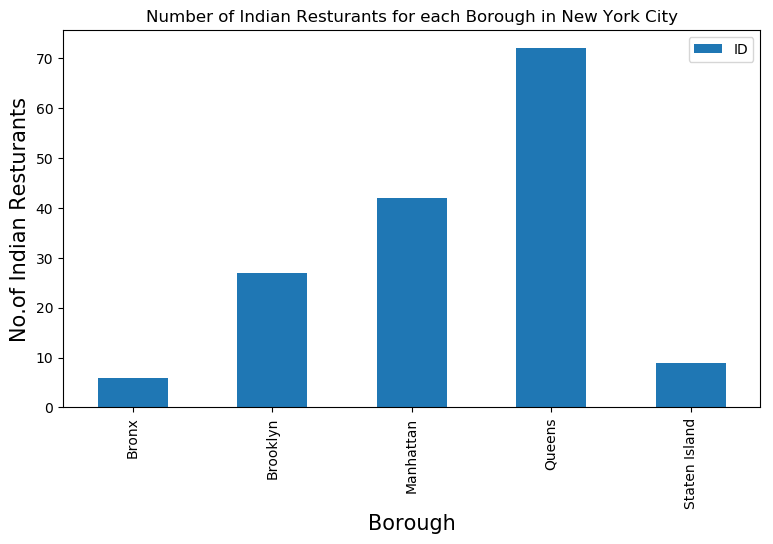

In [286]:


plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()



Similarly these are the average rating of Indian Resturants for each Borough
Lets visualize it

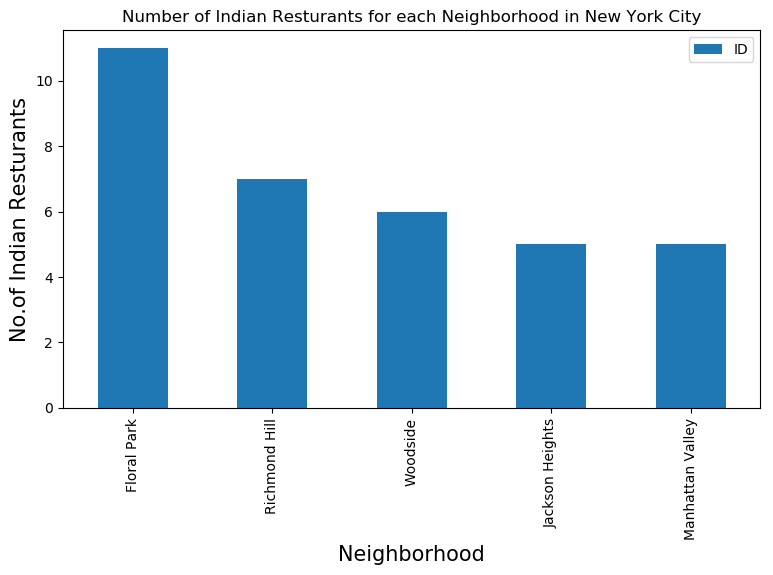

In [287]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [288]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']


Borough Neighborhood                        ID  \
103  Queens  Floral Park  4e4e3e22bd4101d0d7a5c2d1   
104  Queens  Floral Park  4b647b56f964a520c4b62ae3   
105  Queens  Floral Park  527ffc0811d2d329d5e49abd   
106  Queens  Floral Park  4b787c49f964a5209cd12ee3   
107  Queens  Floral Park  4c0c01e0bbc676b00d6b4cd5   
108  Queens  Floral Park  4c76ff35a5676dcb72671721   
109  Queens  Floral Park  4df0f39dd4c04d0392c853ea   
110  Queens  Floral Park  4c953a7672dd224bd8d1a191   
111  Queens  Floral Park  55d68c1b498ecf05fa196fe1   
112  Queens  Floral Park  5d06c43cc03635002cc463f2   
113  Queens  Floral Park  4e6bfe1c7d8b2c711b17bbe5   

                               Name  
103                  Kerala Kitchen  
104        Usha Foods & Usha Sweets  
105                   Jackson Diner  
106       Santoor Indian Restaurant  
107                   Mumbai Xpress  
108                 Flavor Of India  
109                   Sagar Chinese  
110  Real Usha Sweets & Snacks Inc.  
111     Namaste Restaurant and Cafe  
112                          Honest  
113         Surya sweets and snacks

In [289]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      4     8.1    11
( 1 / 156 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 2 / 156 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.1     9
( 3 / 156 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     6.9     3
( 4 / 156 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     6.0     2
( 5 / 156 ) processed
                         ID       Name  Likes  Rating  Tips
0  4b5a4dc8f964a520a2bb28e3  Taj Mahal     38     8.2    26
( 6 / 156 ) processed
                         ID          Name  Likes

KeyError: 'venue'

In [290]:
indian_rest_stats_ny.head()

Borough    Neighborhood                        ID  \
0   Bronx        Woodlawn  4c0448d9310fc9b6bf1dc761   
1   Bronx     Parkchester  4c194631838020a13e78e561   
2   Bronx  Spuyten Duyvil  4c04544df423a593ac83d116   
3   Bronx       Concourse  551b7f75498e86c00a0ed2e1   
4   Bronx       Unionport  4c194631838020a13e78e561   

                          Name Likes  Rating Tips  
0                   Curry Spot     4     8.1   11  
1  Melanies Roti Bar And Grill     3     6.0    2  
2         Cumin Indian Cuisine    13     6.1    9  
3                  Hungry Bird     8     6.9    3  
4  Melanies Roti Bar And Grill     3     6.0    2

In [291]:
indian_rest_ny.shape


(156, 4)

We got 156 Indian Resturants across New York City.

So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day, we will refer to saved data sheet csv if required

In [292]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [293]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

We see that values like Likes, Tips are strig values. We would need to convert them into float for further analysis

In [295]:
indian_rest_stats_ny.info()
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null object
Rating          50 non-null float64
Tips            50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null float64
Rating          50 non-null float64
Tips            50 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [296]:


# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]



Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                836
Rating                               8.8
Tips                                 259
Name: 40, dtype: object

In [310]:
# Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                586
Rating                                 9
Tips                                 145
Name: 44, dtype: object


Now lets visualize neighborhood with maximum average rating of restaurants

In [311]:

ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']


ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)


Neighborhood  Average Rating
27            Tribeca            9.00
12  Greenwich Village            8.90
31       West Village            8.85
17            Midtown            8.80
3             Chelsea            8.80
18        Murray Hill            8.70
25         South Side            8.60
19         North Side            8.60
9         Fort Greene            8.60
24   Roosevelt Island            8.40

In [312]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [313]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
2  Manhattan        8.191304
1   Brooklyn        7.745455
0      Bronx        6.620000

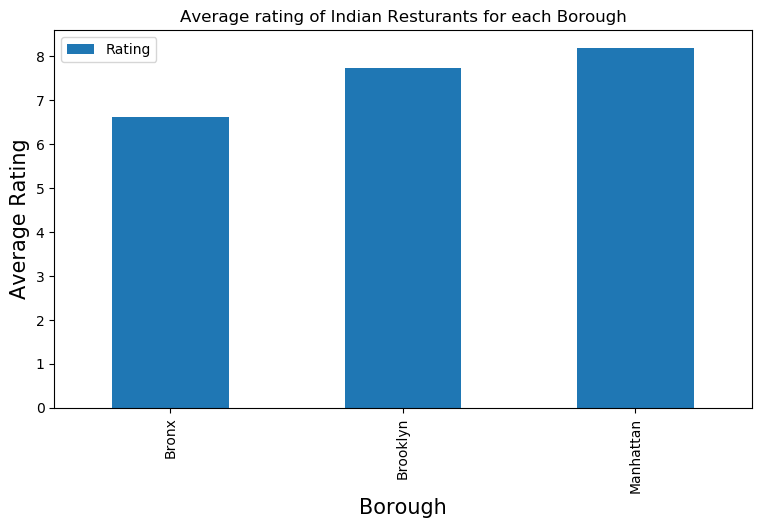

In [314]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [315]:


ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=9.0]

ny_neighborhood_stats

Neighborhood  Average Rating
27      Tribeca             9.0

In [316]:


ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')

ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

ny_neighborhood_stats

Borough Neighborhood   Latitude  Longitude  Average Rating
0  Manhattan      Tribeca  40.721522 -74.010683             9.0

In [317]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [318]:


# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )



In [319]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'



# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)


In [324]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=10)
ny_geo = r'Borough Boundaries.geojson'

ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
#ny_map.save('borough_rating.html')
ny_map

### Conclusion

    Astoria (Queens), Bliss Ville (Queens), Civic Center (Manhattan) are some of the best neighborhoods for Indian cuisine.
    Indian Business Owners looking for a place to open restaurant business with Indian Cuisine, Manhattan has the potential           for Indian Restaurant Market.
    Staten Island ranks last in average rating of Indian Restaurants.
    If you prefer Indian Cuisine, Manhattan is the place to be in
    The location details and ratings are UpToDate as per the norms provided by FourSquare places API

### Limitations

    The ranking is purely on basis of rating of restaurants provided by API
    The accuracy of data depends purely depends on the data provided by FourSquare API

